In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data=pd.read_csv("housing data-1.csv")
data.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000


In [3]:
# remove any unnecessary column
del data['Id']
data


,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1413,6,1999,953,SBrkr,1647,2,Attchd,2,460,NaN,NaN,175000
1414,6,1978,1542,SBrkr,2073,2,Attchd,2,500,MnPrv,NaN,210000
1415,7,1941,1152,SBrkr,2340,2,Attchd,1,252,GdPrv,Shed,266500
1416,5,1950,1078,FuseA,1078,1,NaN,1,240,NaN,NaN,142125


In [4]:
#how many rows and columns
print('ROWS:',data.shape[0])
print('COLUMNS:',data.shape[1])

ROWS: 1418
COLUMNS: 12


In [5]:
# explain 5 point summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.0,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.0,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.5,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.0,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.0,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.0,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.0,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.0,755000.0


# INFERENCES
* The columns sale price,grliving area,garage area ,totalbsmtsf are right skewed and might have outliers.
* garage cars,fullbath and overall quality are numbers categories
* year built is the age of the property between 1872 to 2010

In [6]:
data.describe(include='object').T

,count,unique,top,freq
Electrical,1417,5,SBrkr,1300
GarageType,1275,6,Attchd,800
Fence,270,4,MnPrv,148
MiscFeature,52,4,Shed,47


### INFERENCES
* most of the electrical is  'SBrkr'(mode)
* very few values are in fence and miscfeature

<Axes: >

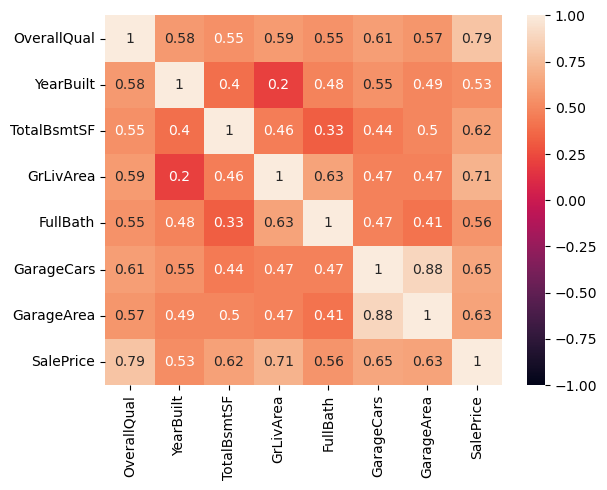

In [7]:
# draw heatmap to show the correlation between the features
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)

# INFERENCES
* the target variable has the maximum relation with overall quality ground living area and garage area
* these correlations are highly afftected by the outliers. the values of these matrices might change after outlier treatment.
* correlation columns are always of number columns

In [8]:
# seperate the category column and number column and perform the univariate analysis
num_cols=data.select_dtypes(include=np.number).columns
cat_cols=data.select_dtypes(include=object).columns


In [9]:
cat_cols=['OverallQual','Electrical','FullBath','GarageCars','Fence','MiscFeature','GarageType']
cat_cols

['OverallQual',
 'Electrical',
 'FullBath',
 'GarageCars',
 'Fence',
 'MiscFeature',
 'GarageType']

In [10]:
num_cols=['YearBuilt','TotalBsmtSF','GrLivArea','GarageArea','SalePrice']
num_cols

['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice']

# UNIVARIATE ANALYSIS

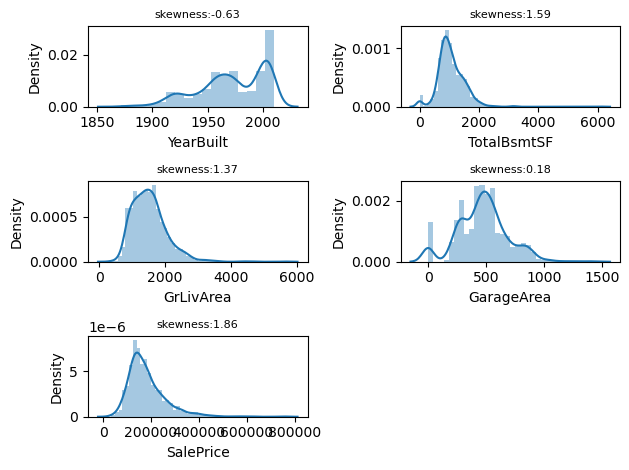

In [11]:
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.distplot(data[i])
    plt.title(f'skewness:{round(data[i].skew(),2)}',fontsize=8)
    t+=1
plt.tight_layout()
plt.show()

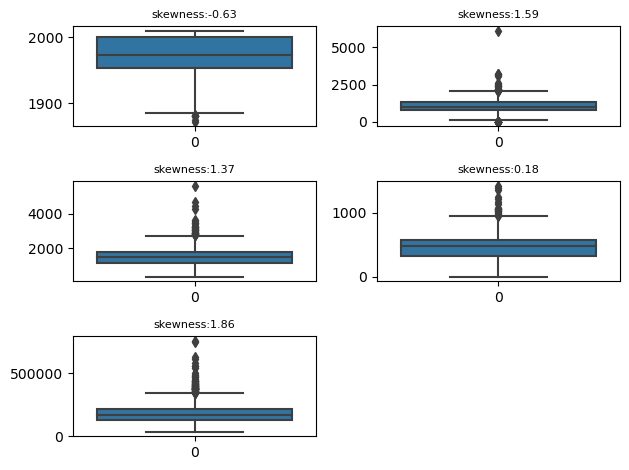

In [12]:
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data[i])
    plt.title(f'skewness:{round(data[i].skew(),2)}',fontsize=8)
    t+=1
plt.tight_layout()
plt.show()

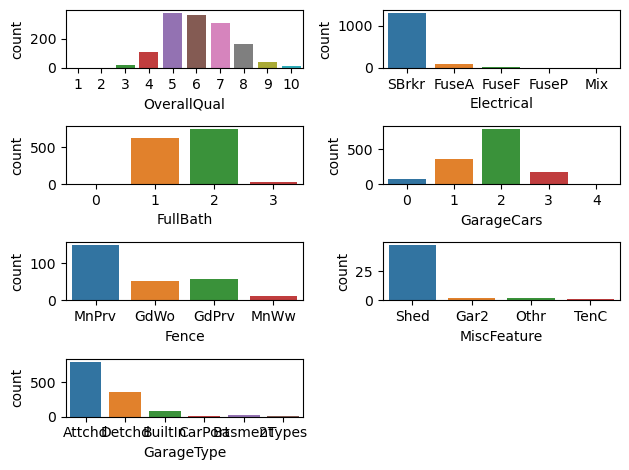

In [13]:
t=1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

# inferences
* most of the houses have overall quality 
* maximum houses have one or two bathrooms ,three or zero bathrooms have minimum 
* most of the property have attached garages
* most of the garage have two cars

# BIVARIATE ANALYSIS

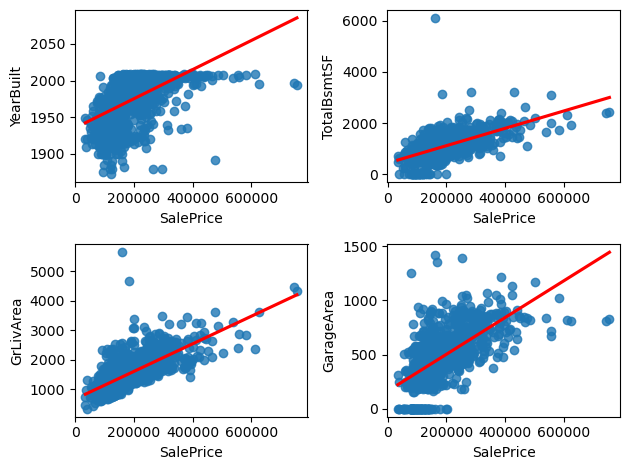

In [14]:
t=1
for i in num_cols:
    if i !='SalePrice':
        plt.subplot(2,2,t)
        sns.regplot(x=data['SalePrice'],y=data[i],ci=0,line_kws={'color':'red'})
        t+=1
plt.tight_layout()
plt.show()


# INFERENCES
* negative relation with old property and sale price
* positive trend with sale price and totalbsmtSF . as the total basement area is increasing sales price is also increasing.
* positive relation between grlivarea and sale price
* positive relation between garagearea and saleprice

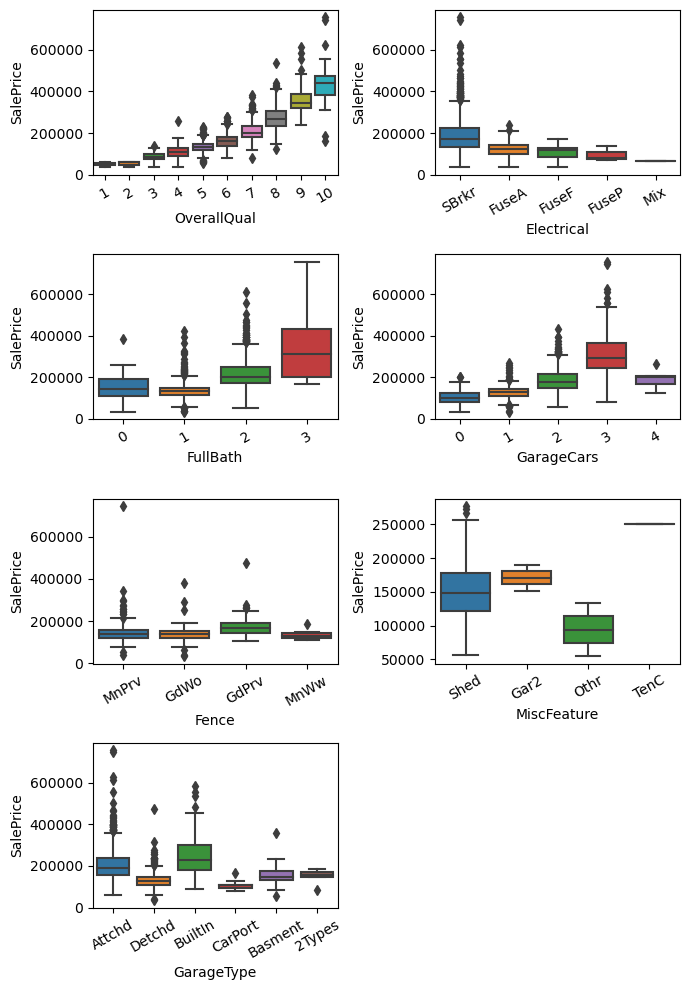

In [15]:
# bivariate (cat vs num)
t=1
plt.figure(figsize=(7,10))
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.boxplot(x=i,y='SalePrice',data=data)
    plt.xticks(rotation=30)
    t+=1
plt.tight_layout()
plt.show()

# INFERENCES
* positive relation between sale and overall quality


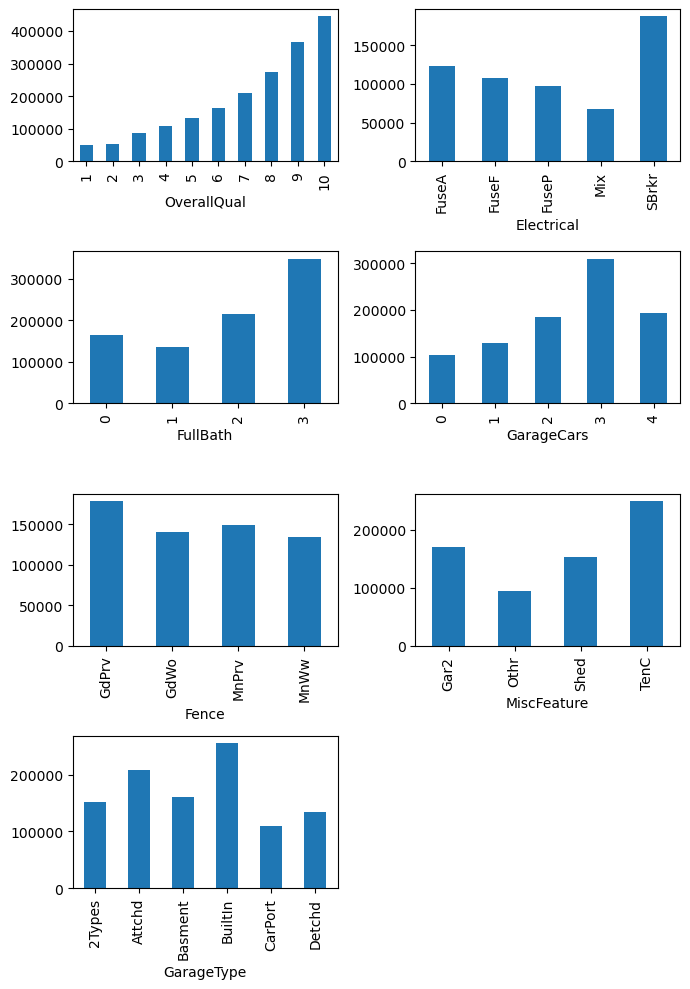

In [16]:
t=1
plt.figure(figsize=(7,10))

for i in cat_cols:
    plt.subplot(4,2,t)
    data.groupby(by=i)['SalePrice'].mean().plot(kind='bar')
    t+=1
plt.tight_layout()
plt.show()

In [17]:
# treat the defects in the datasets 
# treat the missing values and the outliers

In [18]:
# missing value treatment
# step 1: closest fit
# step 2: central value imputation
# step 3: deletion


In [19]:
((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [20]:
data[data['GarageType'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
37,4,1955,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000
39,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000
1407,5,1970,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000
1408,5,1974,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000
1411,5,2006,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500


In [21]:
data['GarageType']=np.where((data['GarageCars']==0)& (data['GarageArea']==0),'NOGARAGE',data['GarageType'])


In [22]:
data[data['GarageType'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
39,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
47,5,1966,955,SBrkr,955,1,NaN,1,386,MnPrv,NaN,127000
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,6,1942,771,SBrkr,1494,1,NaN,1,213,NaN,NaN,177500
1317,5,1966,864,SBrkr,892,1,NaN,1,264,GdWo,NaN,110000
1357,5,1950,1208,FuseA,1904,1,NaN,1,240,GdPrv,NaN,138000
1387,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000


In [23]:
data[data['GarageCars']==1]['GarageType'].mode()

0    Detchd
Name: GarageType, dtype: object

In [24]:
data[data['GarageCars']==1]['GarageType'].value_counts()

Detchd     178
Attchd     105
BuiltIn      8
Basment      8
CarPort      3
Name: GarageType, dtype: int64

In [25]:
data['GarageType']=np.where(data['GarageType'].isnull(),'Detchd',data['GarageType'])

In [26]:
data[data['GarageType'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice


In [27]:
#electrical
data[data['Electrical'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1339,5,2006,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500


In [28]:
data['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [29]:
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)

In [30]:
data[data['Electrical'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice


In [31]:
# lets delete miscfeature and fence
data.drop(columns=['Fence','MiscFeature'],inplace=True)

In [32]:
((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)

OverallQual    0.0
YearBuilt      0.0
TotalBsmtSF    0.0
Electrical     0.0
GrLivArea      0.0
FullBath       0.0
GarageType     0.0
GarageCars     0.0
GarageArea     0.0
SalePrice      0.0
dtype: float64

# OUTLIER TREATMENTS

In [33]:
#grvlivarea
data[data['GrLivArea']>5000]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1260,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [34]:
#totalbsmtSF
data[data['TotalBsmtSF']>6000]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1260,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [35]:
#totalbsmtSF
data[data['SalePrice']>700000]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
665,10,1994,2444,SBrkr,4316,3,Attchd,3,832,755000
1147,10,1996,2396,SBrkr,4476,3,Attchd,3,813,745000


In [36]:
# we can drop these three points
data.drop(index=[1260,665,1147],inplace=True)

<Axes: >

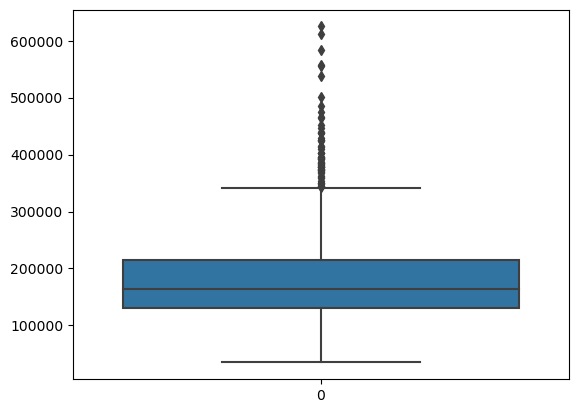

In [37]:
sns.boxplot(data['SalePrice'])

# outlier treatment (capping)

In [38]:
q1,q3=np.quantile(data['SalePrice'],[0.25,0.75])
iqr=q3-q1
upperlimit=q3+1.5*(iqr)
data['SalePrice']=np.where(data['SalePrice']>upperlimit,upperlimit,data['SalePrice'])

<Axes: >

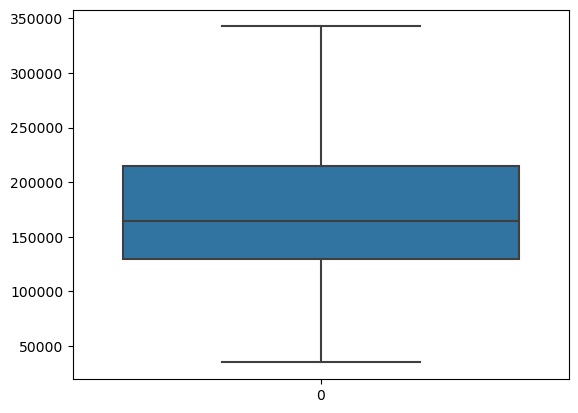

In [39]:
sns.boxplot(data['SalePrice'])

<Axes: >

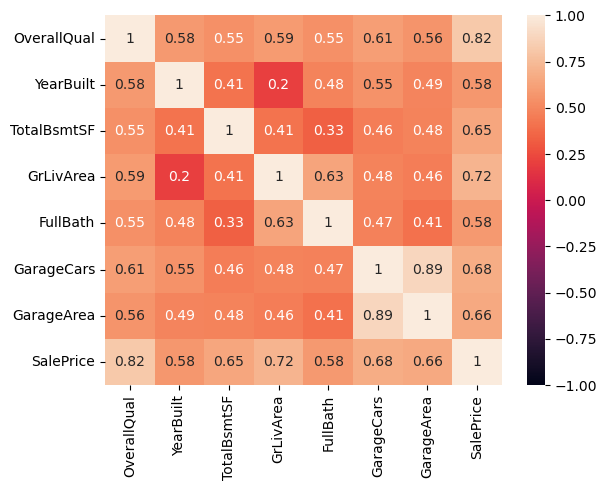

In [40]:
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)

In [41]:
# treat all the object datatypes with appropriate encoding technique

In [42]:
data[data.select_dtypes('object').columns]

,Electrical,GarageType
0,SBrkr,Attchd
1,SBrkr,Attchd
2,SBrkr,Attchd
3,SBrkr,Detchd
4,SBrkr,Attchd
...,...,...
1413,SBrkr,Attchd
1414,SBrkr,Attchd
1415,SBrkr,Attchd
1416,FuseA,Detchd


In [43]:
data['GarageType'].value_counts()

Attchd      797
Detchd      416
BuiltIn      87
NOGARAGE     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [44]:
data['Electrical'].value_counts()

SBrkr    1298
FuseA      89
FuseF      24
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [45]:
# data['Electrical']=np.where(data['Electrical']=='SBrkr',1,0)

In [46]:
data['Electrical']=np.where(data['Electrical']=='SBrkr','SBkrk','Others')

In [47]:
data['Electrical'].value_counts()

SBkrk     1298
Others     117
Name: Electrical, dtype: int64

In [48]:
map_data=data['GarageType'].value_counts().to_dict()

In [49]:
map_data #frequency encoding

{'Attchd': 797,
 'Detchd': 416,
 'BuiltIn': 87,
 'NOGARAGE': 81,
 'Basment': 19,
 'CarPort': 9,
 '2Types': 6}

In [50]:
map_data=np.round(data.groupby(by='GarageType')['SalePrice'].mean(),0).to_dict()

In [51]:
map_data  #target encoding

{'2Types': 151283.0,
 'Attchd': 203960.0,
 'Basment': 159697.0,
 'BuiltIn': 239760.0,
 'CarPort': 109962.0,
 'Detchd': 133535.0,
 'NOGARAGE': 103317.0}

In [52]:
data['GarageType']=data['GarageType'].map(map_data)

In [53]:
data

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
0,7,2003,856,SBkrk,1710,2,203960.0,2,548,208500.0
1,6,1976,1262,SBkrk,1262,2,203960.0,2,460,181500.0
2,7,2001,920,SBkrk,1786,2,203960.0,2,608,223500.0
3,7,1915,756,SBkrk,1717,1,133535.0,3,642,140000.0
4,8,2000,1145,SBkrk,2198,2,203960.0,3,836,250000.0
...,...,...,...,...,...,...,...,...,...,...
1413,6,1999,953,SBkrk,1647,2,203960.0,2,460,175000.0
1414,6,1978,1542,SBkrk,2073,2,203960.0,2,500,210000.0
1415,7,1941,1152,SBkrk,2340,2,203960.0,1,252,266500.0
1416,5,1950,1078,Others,1078,1,133535.0,1,240,142125.0


# SCALING

# power transformation

In [54]:
num_cols

['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice']

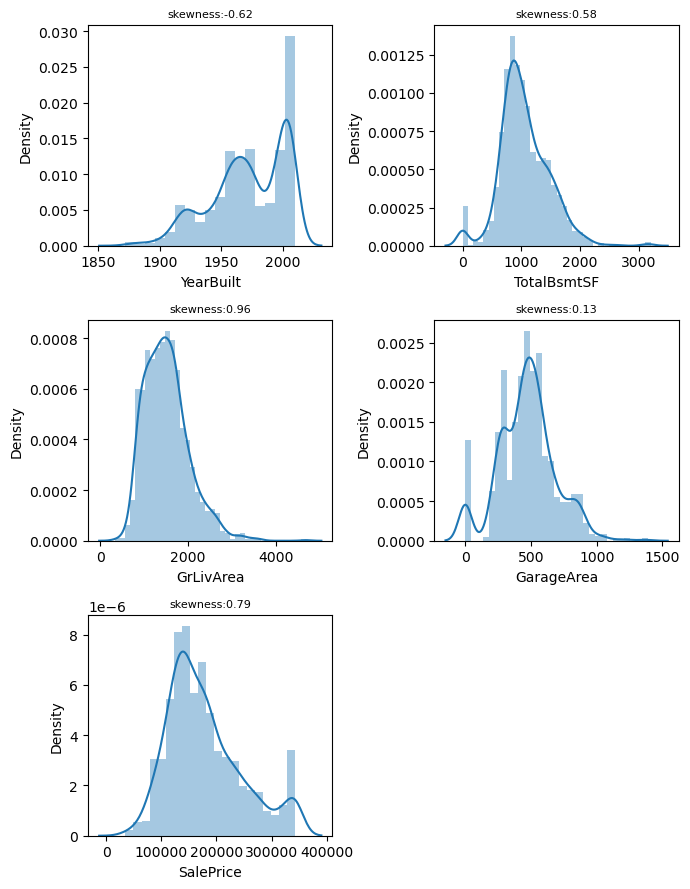

In [55]:
t=1
plt.figure(figsize=(7,9))
for i in num_cols:
    plt.subplot(3,2,t)
    sns.distplot(data[i])
    plt.title(f'skewness:{round(data[i].skew(),2)}',fontsize=8)
    t+=1
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Skewness0.35'}>

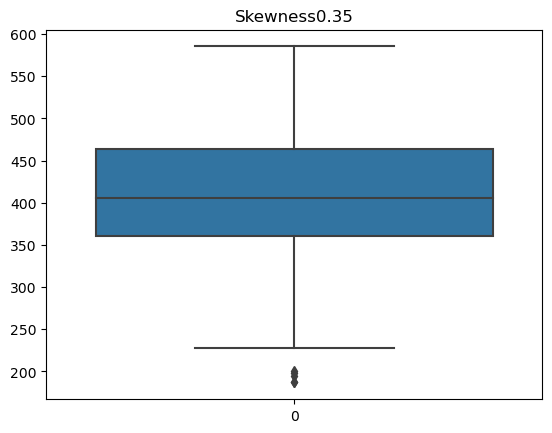

In [56]:
sqrt_sale=np.sqrt(data['SalePrice'])
plt.title(f'Skewness{round(sqrt_sale.skew(),2)}')
sns.boxplot(sqrt_sale)


In [57]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 200x200 with 0 Axes>

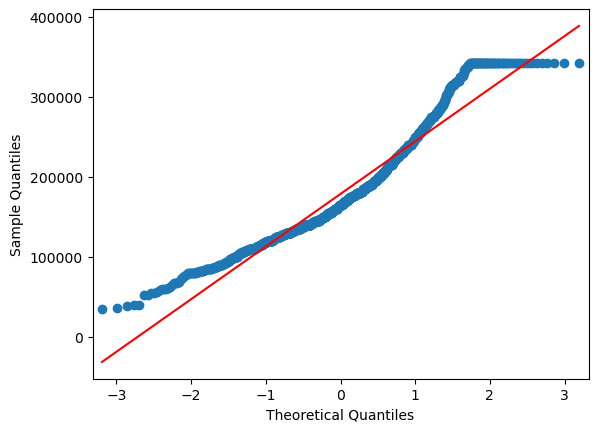

In [58]:
plt.figure(figsize=(2,2))
qqplot(data['SalePrice'],line='r')
plt.show()

In [59]:
# sqrt transformation is not possible if you have -ve values in column
np.sqrt(-9)

nan

In [60]:
# log transformation is not possible if we have -ve or zeros in the data
# 0--------infinity
#-ve ------nan

In [61]:
from sklearn.preprocessing import PowerTransformer

In [62]:
pt= PowerTransformer(method='box-cox',standardize=False) # yeo jhonson

In [63]:
pt.fit_transform(pd.DataFrame(data['SalePrice']))

array([[40.86656218],
       [39.78452303],
       [41.41819257],
       ...,
       [42.84465705],
       [37.93709879],
       [38.21264549]])

In [64]:
pt.lambdas_

array([0.16869164])

In [65]:
trans_saleprice=pt.fit_transform(pd.DataFrame(data['SalePrice']))

In [66]:
pt.inverse_transform(trans_saleprice)

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]])

In [67]:
import scipy.stats as stats

In [68]:
stats.skew(trans_saleprice[:,0])

0.0015568602068277426

<Figure size 200x200 with 0 Axes>

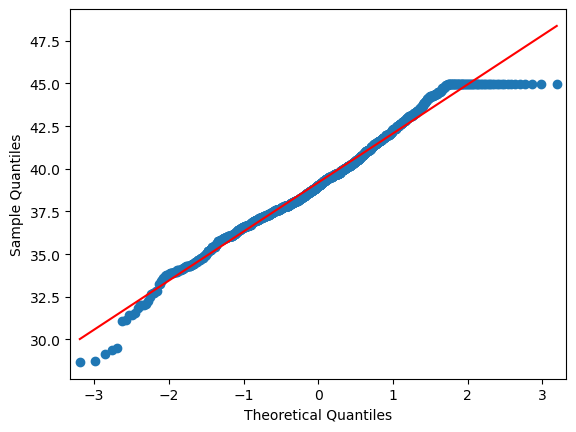

In [69]:
plt.figure(figsize=(2,2))
qqplot(trans_saleprice[:,0],line='r')
plt.show()

* we perform transformation only on numerical value. we never perform it on categorical data

In [70]:
pt=PowerTransformer(standardize=False)

In [71]:
trans_data=pt.fit_transform(data[num_cols])

In [72]:
trans_data=pd.DataFrame(trans_data,columns=num_cols)

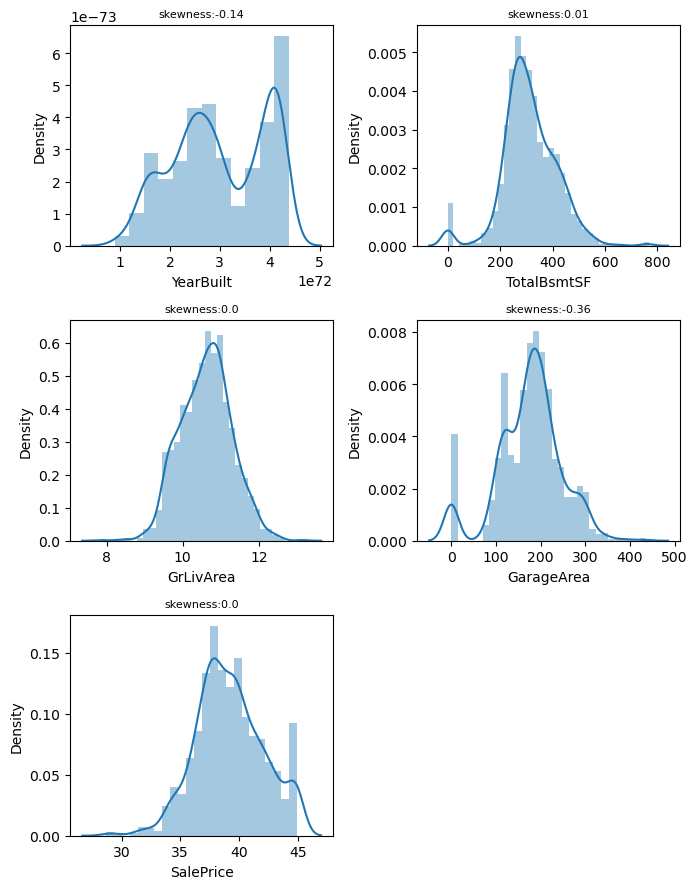

In [73]:
t=1
plt.figure(figsize=(7,9))
for i in num_cols:
    plt.subplot(3,2,t)
    sns.distplot(trans_data[i])
    plt.title(f'skewness:{round(trans_data[i].skew(),2)}',fontsize=8)
    t+=1
plt.tight_layout()
plt.show()

# TRAIN TEST SPLIT

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x=data.drop(columns=['SalePrice'])
y=data['SalePrice']

In [76]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.75)

In [77]:
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(1061, 9) (354, 9) (1061,) (354,)


In [78]:
data.shape

(1415, 10)

In [79]:
x.shape

(1415, 9)

In [80]:
y.shape

(1415,)

# SCALING

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
sc=StandardScaler()

In [83]:
for i in num_cols:
    if i !='SalePrice':
        sc=StandardScaler()
        train_x[i]=sc.fit_transform(pd.DataFrame(train_x[i]))
        test_x[i]=sc.transform(pd.DataFrame(test_x[i]))
    

In [84]:
train_x

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea
313,8,1.060742,5.335705,SBkrk,0.252966,2,203960.0,3,1.958841
799,7,0.994524,1.004694,SBkrk,-0.136203,2,203960.0,2,0.308556
279,6,-0.098079,-0.854279,SBkrk,0.480480,1,203960.0,2,0.364657
1181,6,0.233013,-2.589650,SBkrk,0.797803,2,203960.0,2,0.364657
459,9,1.093852,1.941596,SBkrk,0.694024,2,203960.0,3,1.453938
...,...,...,...,...,...,...,...,...,...
672,5,-0.197407,-0.379648,SBkrk,-1.213902,1,133535.0,1,-0.584374
382,8,0.895196,0.230946,SBkrk,1.518264,2,239760.0,2,-0.191672
1245,5,0.199903,-0.018730,SBkrk,-0.922524,2,133535.0,2,0.107530
319,7,0.431668,0.396572,SBkrk,0.237000,2,203960.0,2,-0.098171


# STATISTICAL ANALYSIS

* key inferences: saleprice is highly affected
   * BuildQual     --  cat
   * GrLivArea     --  num
   * GarageArea    --  num
   * TotalBasmtSF  --  num
   * FullBath      --  cat

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

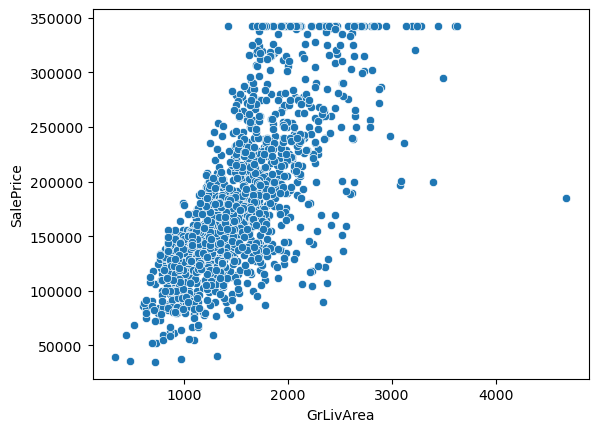

In [85]:
sns.scatterplot(x=data['GrLivArea'],y=data['SalePrice'])

In [86]:
data[['SalePrice','GrLivArea']].corr()

,SalePrice,GrLivArea
SalePrice,1.000000,0.717555
GrLivArea,0.717555,1.000000


In [87]:
# two sample t-test(test for independence)
# assumptions
# * data must be normal
# * samples must have equal variance

In [88]:
from scipy.stats import shapiro,levene,mannwhitneyu,pearsonr,kruskal

In [89]:
# normality
p=shapiro(data['SalePrice'])[1]
if p>0.05:
    print('Ho :the data is normal')
else:
    print('Ha: the data is not normal')

Ha: the data is not normal


In [90]:
# in this case we have to use non-parametric (mannwhitneyu) test
mannwhitneyu(data['SalePrice'],data['GrLivArea'])

MannwhitneyuResult(statistic=2002225.0, pvalue=0.0)

In [91]:
mannwhitneyu(data['SalePrice'],data['GrLivArea'])
if p>0.05:
    print('Ho :the two samples are independent')
else:
    print('Ha: two samples are dependent')

Ha: two samples are dependent


In [92]:
pearsonr(data['SalePrice'],data['GrLivArea'])

PearsonRResult(statistic=0.7175552900300467, pvalue=3.307921520146044e-224)

In [93]:
pearsonr(data['SalePrice'],data['GrLivArea'])
if p>0.05:
    print('Ho :the two samples are non-correlated')
else:
    print('Ha: two samples are correlated')

Ha: two samples are correlated


<Axes: xlabel='GarageArea', ylabel='SalePrice'>

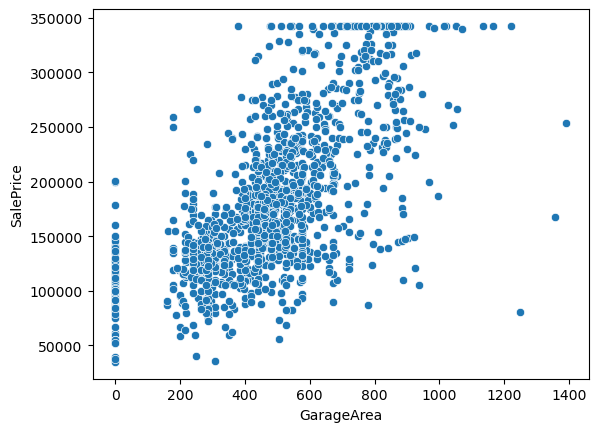

In [94]:
sns.scatterplot(x=data['GarageArea'],y=data['SalePrice'])

In [95]:
# sale price and garagearea
# non-parametric test
pearsonr(data['SalePrice'],data['GarageArea'])
if p>0.05:
    print('Ho :the two samples are non-correlated')
else:
    print('Ha: two samples are correlated')

Ha: two samples are correlated


In [96]:
mannwhitneyu(data['SalePrice'],data['GarageArea'])
if p>0.05:
    print('Ho :the two samples are independent')
else:
    print('Ha: two samples are dependent')

Ha: two samples are dependent


In [97]:
# build quality and saleprice

* for category vs number -- ANOVA ~ For non parametric -- KRUSKAL WALLIS

In [98]:
data['OverallQual'].value_counts()
samp1=data[data['OverallQual']==1]['SalePrice']
samp2=data[data['OverallQual']==2]['SalePrice']
samp3=data[data['OverallQual']==3]['SalePrice']
samp4=data[data['OverallQual']==4]['SalePrice']
samp5=data[data['OverallQual']==5]['SalePrice']
samp6=data[data['OverallQual']==6]['SalePrice']
samp7=data[data['OverallQual']==7]['SalePrice']
samp8=data[data['OverallQual']==8]['SalePrice']
samp9=data[data['OverallQual']==9]['SalePrice']
samp10=data[data['OverallQual']==10]['SalePrice']
print(kruskal(samp1,samp2,samp3,samp4,samp5,samp6,samp7,samp8,samp9,samp10))
if p>0.05:
    print('Ho :there is no relation between columns')
else:
    print('Ha: there is significant relation between columns')

KruskalResult(statistic=942.0457361207007, pvalue=5.377773193650337e-197)
Ha: there is significant relation between columns


# Analysing Fence and Misc Features

In [99]:
# original dataset 
df=pd.read_csv('housing data-1.csv')
df.head(2)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500


In [100]:
df['Fence'].value_counts()

MnPrv    148
GdPrv     58
GdWo      53
MnWw      11
Name: Fence, dtype: int64

In [101]:
df['Fence']=np.where(df['Fence'].isnull(),'NO','YES')

In [102]:
df['Fence'].value_counts()

NO     1148
YES     270
Name: Fence, dtype: int64

In [103]:
samp1=df[df['Fence']=='YES']['SalePrice']
samp2=df[df['Fence']=='NO']['SalePrice']
p=mannwhitneyu(samp1,samp2)[1]
if p>0.05:
    print('Ho :mu1=mu2')
else:
    print('Ha: mu1!=m2')

Ha: mu1!=m2


<Axes: xlabel='Fence', ylabel='SalePrice'>

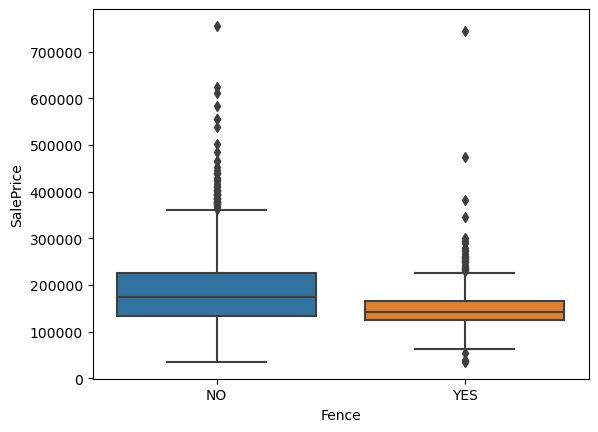

In [104]:
sns.boxplot(x=df['Fence'],y=df['SalePrice'])